## Course: ALY 6070
## Assignment: Data Visualization Individual Assginments ( College major employment data)
## Author: Yuanying Li



### Content
### 1. Introduction 
### 2.  Importing dataset and packages
   
     2.1 Import necessary packages
     2.2 Import datasets

### 3. Explore all_ages dataset
     3.1 Rudimentary Analysis
     3.2 Exploratory Data Analysis and Data Visualization
### 4. Explore recent_grads dataset
     4.1 Rudimentary analysis
     4.2  Draw Scatter Plots
     4.3  Histograms
     4.4 Bar 
     4.5 Box plot to explore the distributions of median salaries and unemployment rate.
     4.6 Hexagonal bin plot to visualize the columns that had dense scatter plots.
### 5. Explore grad_students
### 6. Explore women_stem 
### 7.Explore majors_list
### 8. Conclusion

## 1. Introduction
Going to college provides an opportunity to not only earn a degree, but also
boost our earning potential in the real world. When somebody tells you they
are headed to a college or university, whether it’s for an associate degree,
bachelor’s degree, master’s degree, MBA or PhD, the first question out of
everybody’s mouth is 'Where are you going to school? In reality though, the
choice of major can have a much bigger impact on our future earnings than
the school you attend. And here is some information we could get from some
datasets.

## 2. Importing dataset and packages
### 2.1 Import necessary packages

In [1]:
import numpy as np
import random
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
import seaborn as sbn
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

### 2.2 Import datasets


In [2]:
#Acquire the data
#Links to raw files for college-major datasets provided by FiveThirtyEight
all_ages = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv')
recent_grads = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')
grad_students = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/grad-students.csv')
women_stem = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')
majors_list = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/majors-list.csv')


## Field description

*   Rank - Rank by median earnings
*   Major_code - Major code, FO1DP in ACS PUMS
*   Major - Major description.
*   Major_category - Category of major from Carnevale et al
*   Total - Total number of people with major
*   Sample_size - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
*   Men - Male graduates
*   Women - Female graduates
*   ShareWomen - Women as share of total
*   Employed - Number employed (ESR == 1 or 2)
*   Full_time - Employed 35 hours or more
*   Part_time - Employed less than 35 hours
*  Full_time_year_round - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
*   Unemployed - Number unemployed (ESR == 3)
*   Unemployment_rate - Unemployed / (Unemployed + Employed)
*   Median - Median earnings of full-time, year-round workers
*   P25th - 25th percentile of earnings
*   P75th - 75th percentile of earnings 
*   College_jobs - Number with job requiring a college degree
*   Non_college_jobs - Number with job not requiring a college degree
*   Low_wage_jobs - Number in low-wage service jobs

## 3. Explore all_ages dataset
### 3.1 Rudimentary Analysis

In [3]:
#Show shape of dataframe all ages
print("Shape of dataframe all ages is: {}".format(all_ages.shape))
all_ages.head()

Shape of dataframe all ages is: (173, 11)


,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [4]:
# Columns datatypes and missign values
all_ages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
Major_code                       173 non-null int64
Major                            173 non-null object
Major_category                   173 non-null object
Total                            173 non-null int64
Employed                         173 non-null int64
Employed_full_time_year_round    173 non-null int64
Unemployed                       173 non-null int64
Unemployment_rate                173 non-null float64
Median                           173 non-null int64
P25th                            173 non-null int64
P75th                            173 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 15.0+ KB


### Observations:

1.The data provided has no missing values.we do not have to do any imputation

2.The dataset contains several numerical and categorical columns providing various information on Major details,for categorical variable we could use Seaborn Categorical Plots to visualize dataset in Python, such as barplot, countplot, boxplot.

### 3.2 Exploratory Data Analysis and Data Visualization

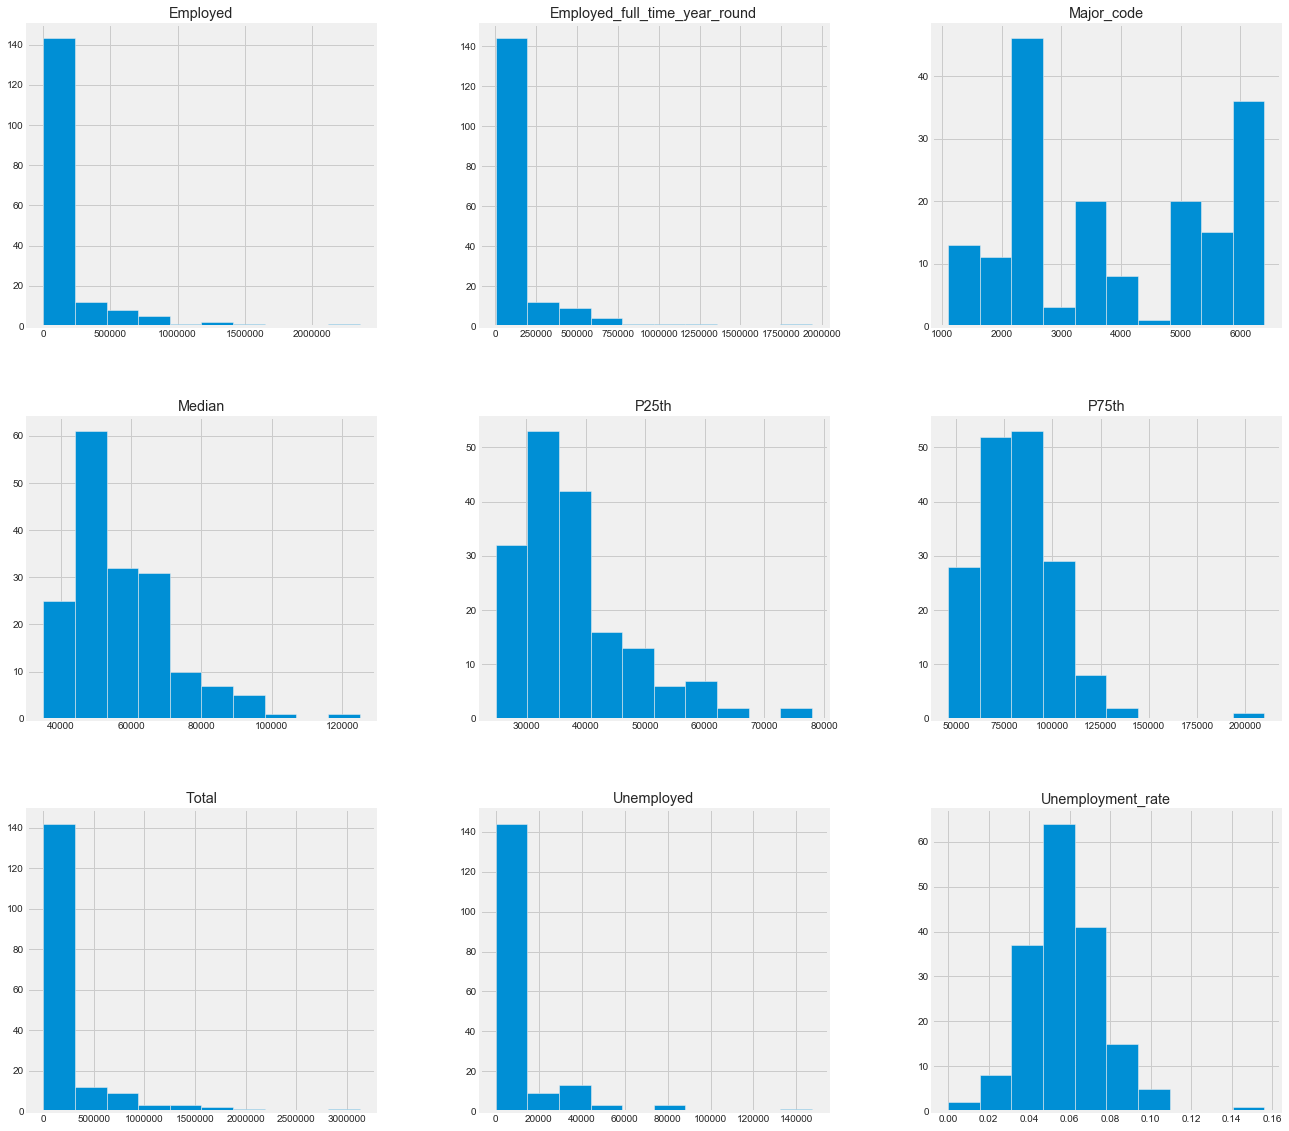

In [5]:
#Plot histograms of every feature
all_ages.hist(figsize=(20,20))
plt.show()

In [6]:
# Count how many majors in all_ages dataset
print("The number of majors in all ages dataset are: {}".format(all_ages['Major'].value_counts().sum()))

The number of majors in all ages dataset are: 173


In [7]:
# Count the number of each major category
all_ages['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [8]:
# Sort the total number of people with major with descending order
major_sorted = all_ages.sort_values('Total',ascending=False)[['Major', 'Total']]
major_sorted

,Major,Total
161,BUSINESS MANAGEMENT AND ADMINISTRATION,3123510
158,GENERAL BUSINESS,2148712
159,ACCOUNTING,1779219
153,NURSING,1769892
114,PSYCHOLOGY,1484075
...,...,...
85,PHARMACOLOGY,5015
104,ASTRONOMY AND ASTROPHYSICS,4700
93,MILITARY TECHNOLOGIES,4315
26,EDUCATIONAL ADMINISTRATION AND SUPERVISION,4037


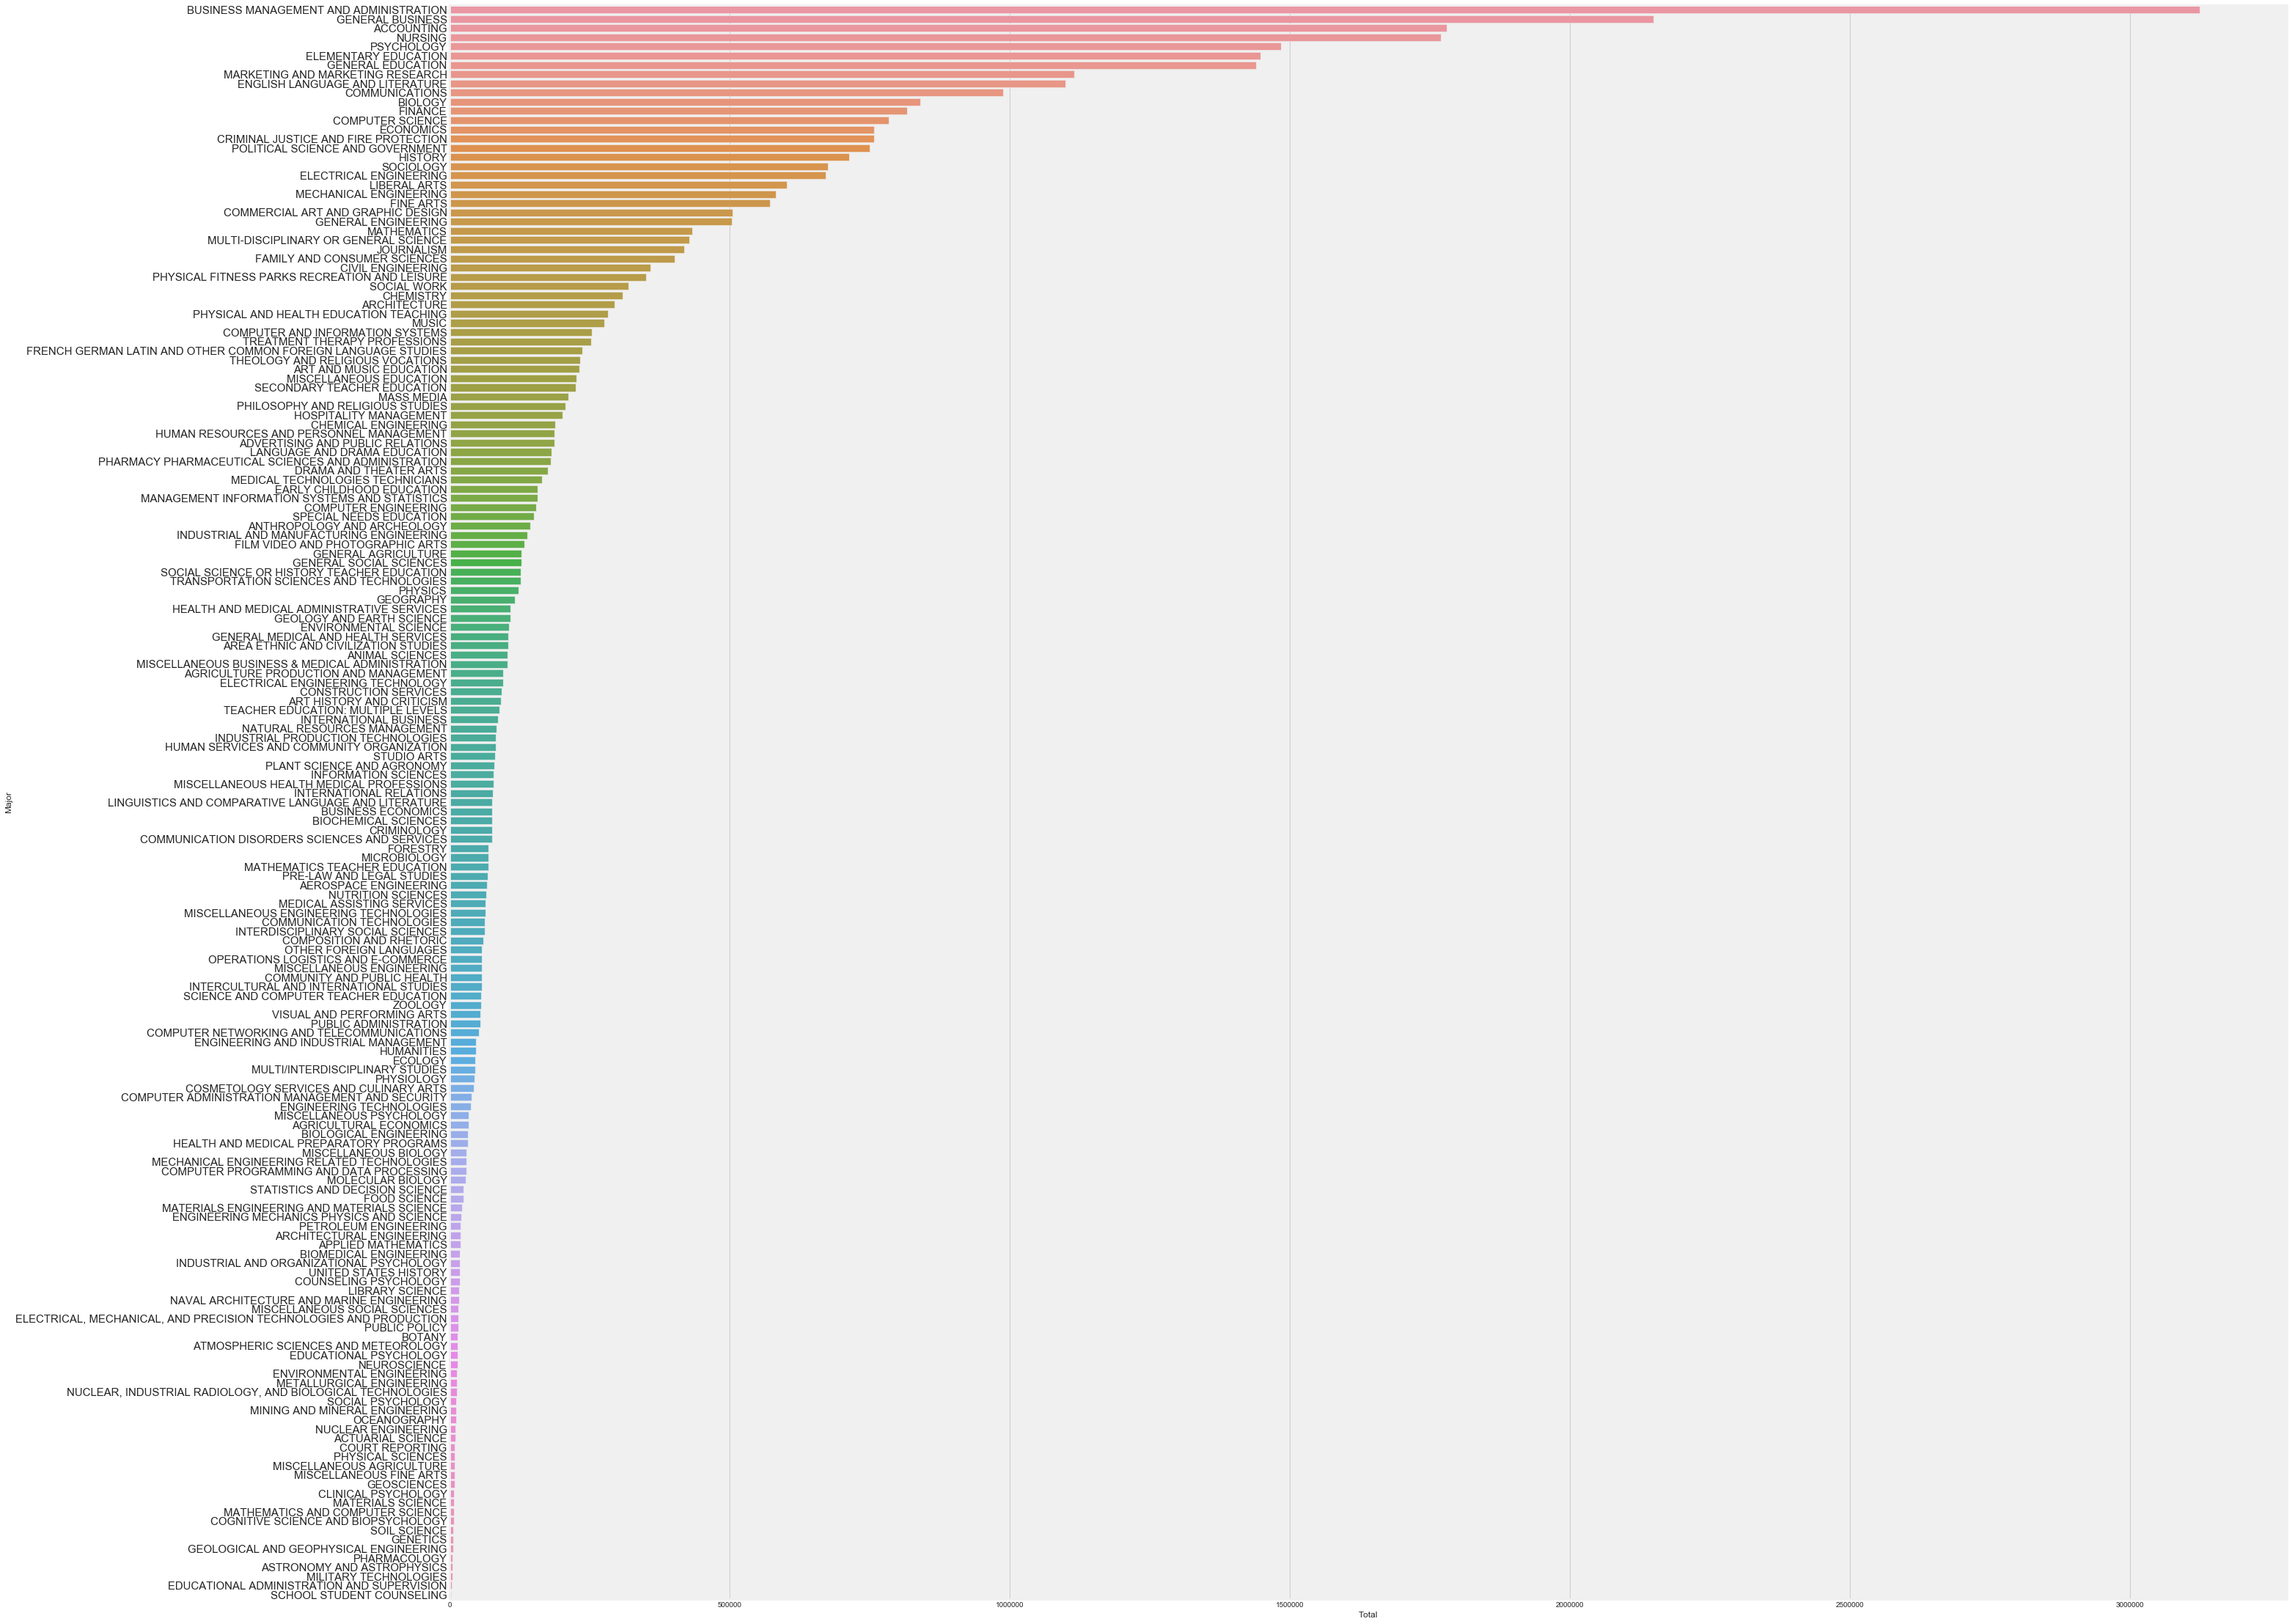

In [9]:
# Use bar plot to show the total number of people with major
plt.figure(figsize = (40, 40))
plt.yticks( fontsize = 15)
sns.barplot(y = major_sorted.Major, x = major_sorted.Total)

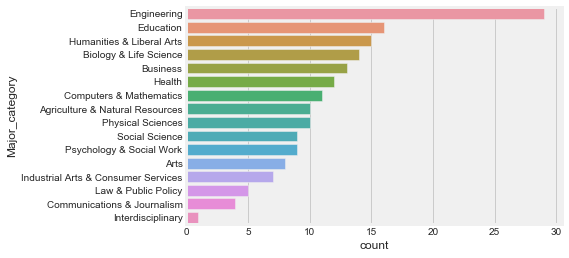

In [10]:
# Show the number of each major category
sns.countplot(y='Major_category',data=all_ages, order = all_ages['Major_category'].value_counts().index)

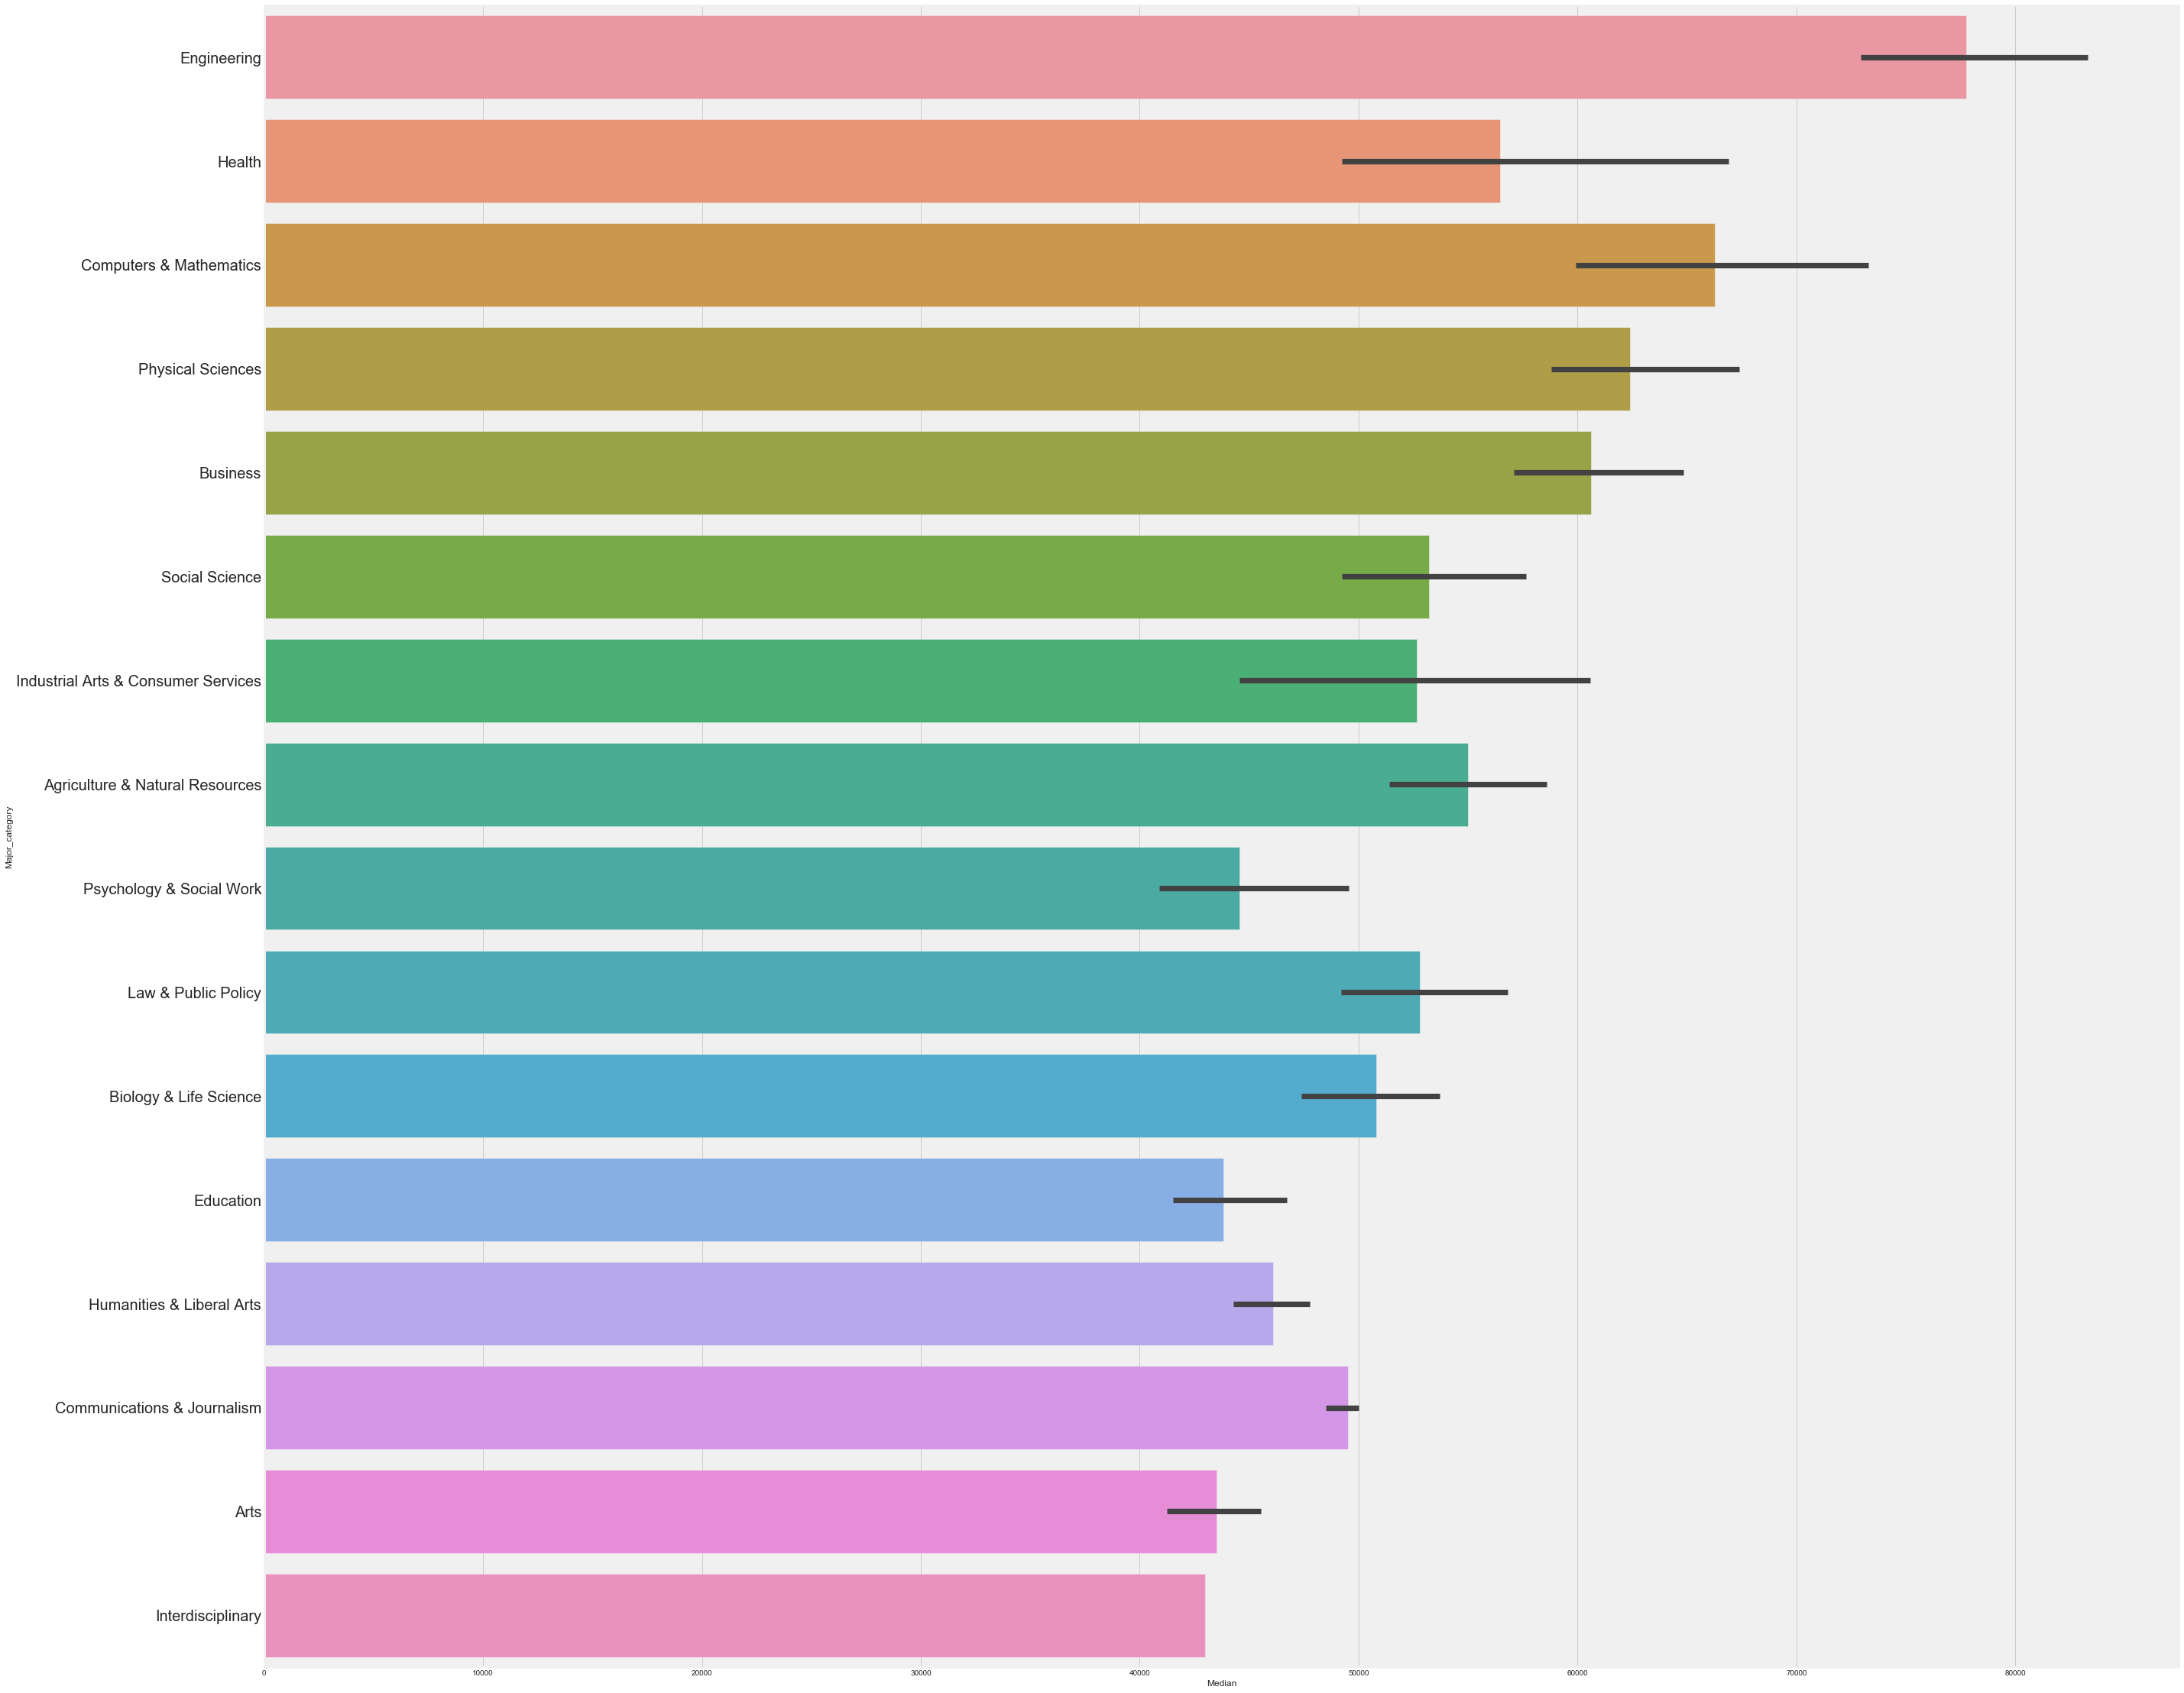

In [11]:
# Sort the median with major category with descending order
# Use bar plot to show the median with major category
major_median_sorted = all_ages.sort_values('Median',ascending=False)[['Major_category', 'Median']]
major_median_sorted
plt.figure(figsize = (40, 40))
plt.yticks( fontsize = 20)
sns.barplot(y = major_median_sorted.Major_category, x = major_median_sorted.Median)

### Observations:

1. In all_ages dataset, there are 173 majors and the 16 groups.


2. Most and Least Popular Majors:

  *   Business Management and Administration (8 percent) is the most popular major, followed by General Business (5 percent), Accounting (5 percent),and Nursing (4 percent).

   *  The least popular majors include MilitaryTechnologies, Soil Science, and Pharmacology (all less than 1 percent of all majors).
   *  The highest median earnings are found in the Engineering major group  ( 75,000), while thelowest are the Interdisciplinary (42,000). 
   
   *  So Does mean the hottest program can earn the highest money? We could have a further analysis.


## 4. Explore recent_grads dataset
### 4.1 Rudimentary analysis

In [12]:
# Get the shape of dataframe
# This dataset already is already sorted by descending order of median income.
print('Rows:', recent_grads.shape[0])
print('Columns:', recent_grads.shape[1])
recent_grads.head()

Rows: 173
Columns: 21


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [13]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [14]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

### Observations:


  1. there is a null values in ShareWomen Feature, which we could drop next.


 
  
  
  2. Let's take a look at describe analysis at recent graduate situation:
   * Looks like a full time job of most majors coming out of school start at salaries around 40,151, with most people making between 24,000 and  33,000. Comparing the minmum salary and maximum salary, the highest earning major earns 80% more at the median than the lowest-earning major at the median.
   * The number of male graduates are about 16723.406977 and the number of female graduates are about 22646.674419, it shows women as share of total is greater than men as share of total.

   * Of course, these numbers will vary depending on major. There can be a lot of variability depending on the college major.

In [15]:
# Drop null value
recent_grads.dropna(axis = 0)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


Text(0.5, 0, 'Median Salaries')

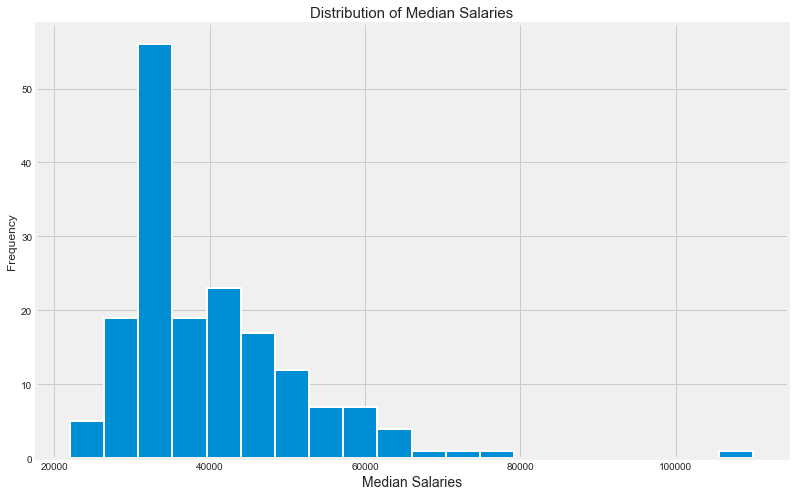

In [16]:
plt.figure(figsize = (12,8))
recent_grads.Median.plot(kind = 'hist', bins = 20, edgecolor = 'white', linewidth = 2)
plt.title("Distribution of Median Salaries", fontsize = 15)
plt.xlabel("Median Salaries", fontsize = 14)

In [17]:
median = recent_grads.sort_values('Median')[['Major', 'Median']]

In [18]:
median

,Major,Median
172,LIBRARY SCIENCE,22000
171,COUNSELING PSYCHOLOGY,23400
169,EDUCATIONAL PSYCHOLOGY,25000
170,CLINICAL PSYCHOLOGY,25000
168,ZOOLOGY,26000
...,...,...
4,CHEMICAL ENGINEERING,65000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
2,METALLURGICAL ENGINEERING,73000
1,MINING AND MINERAL ENGINEERING,75000


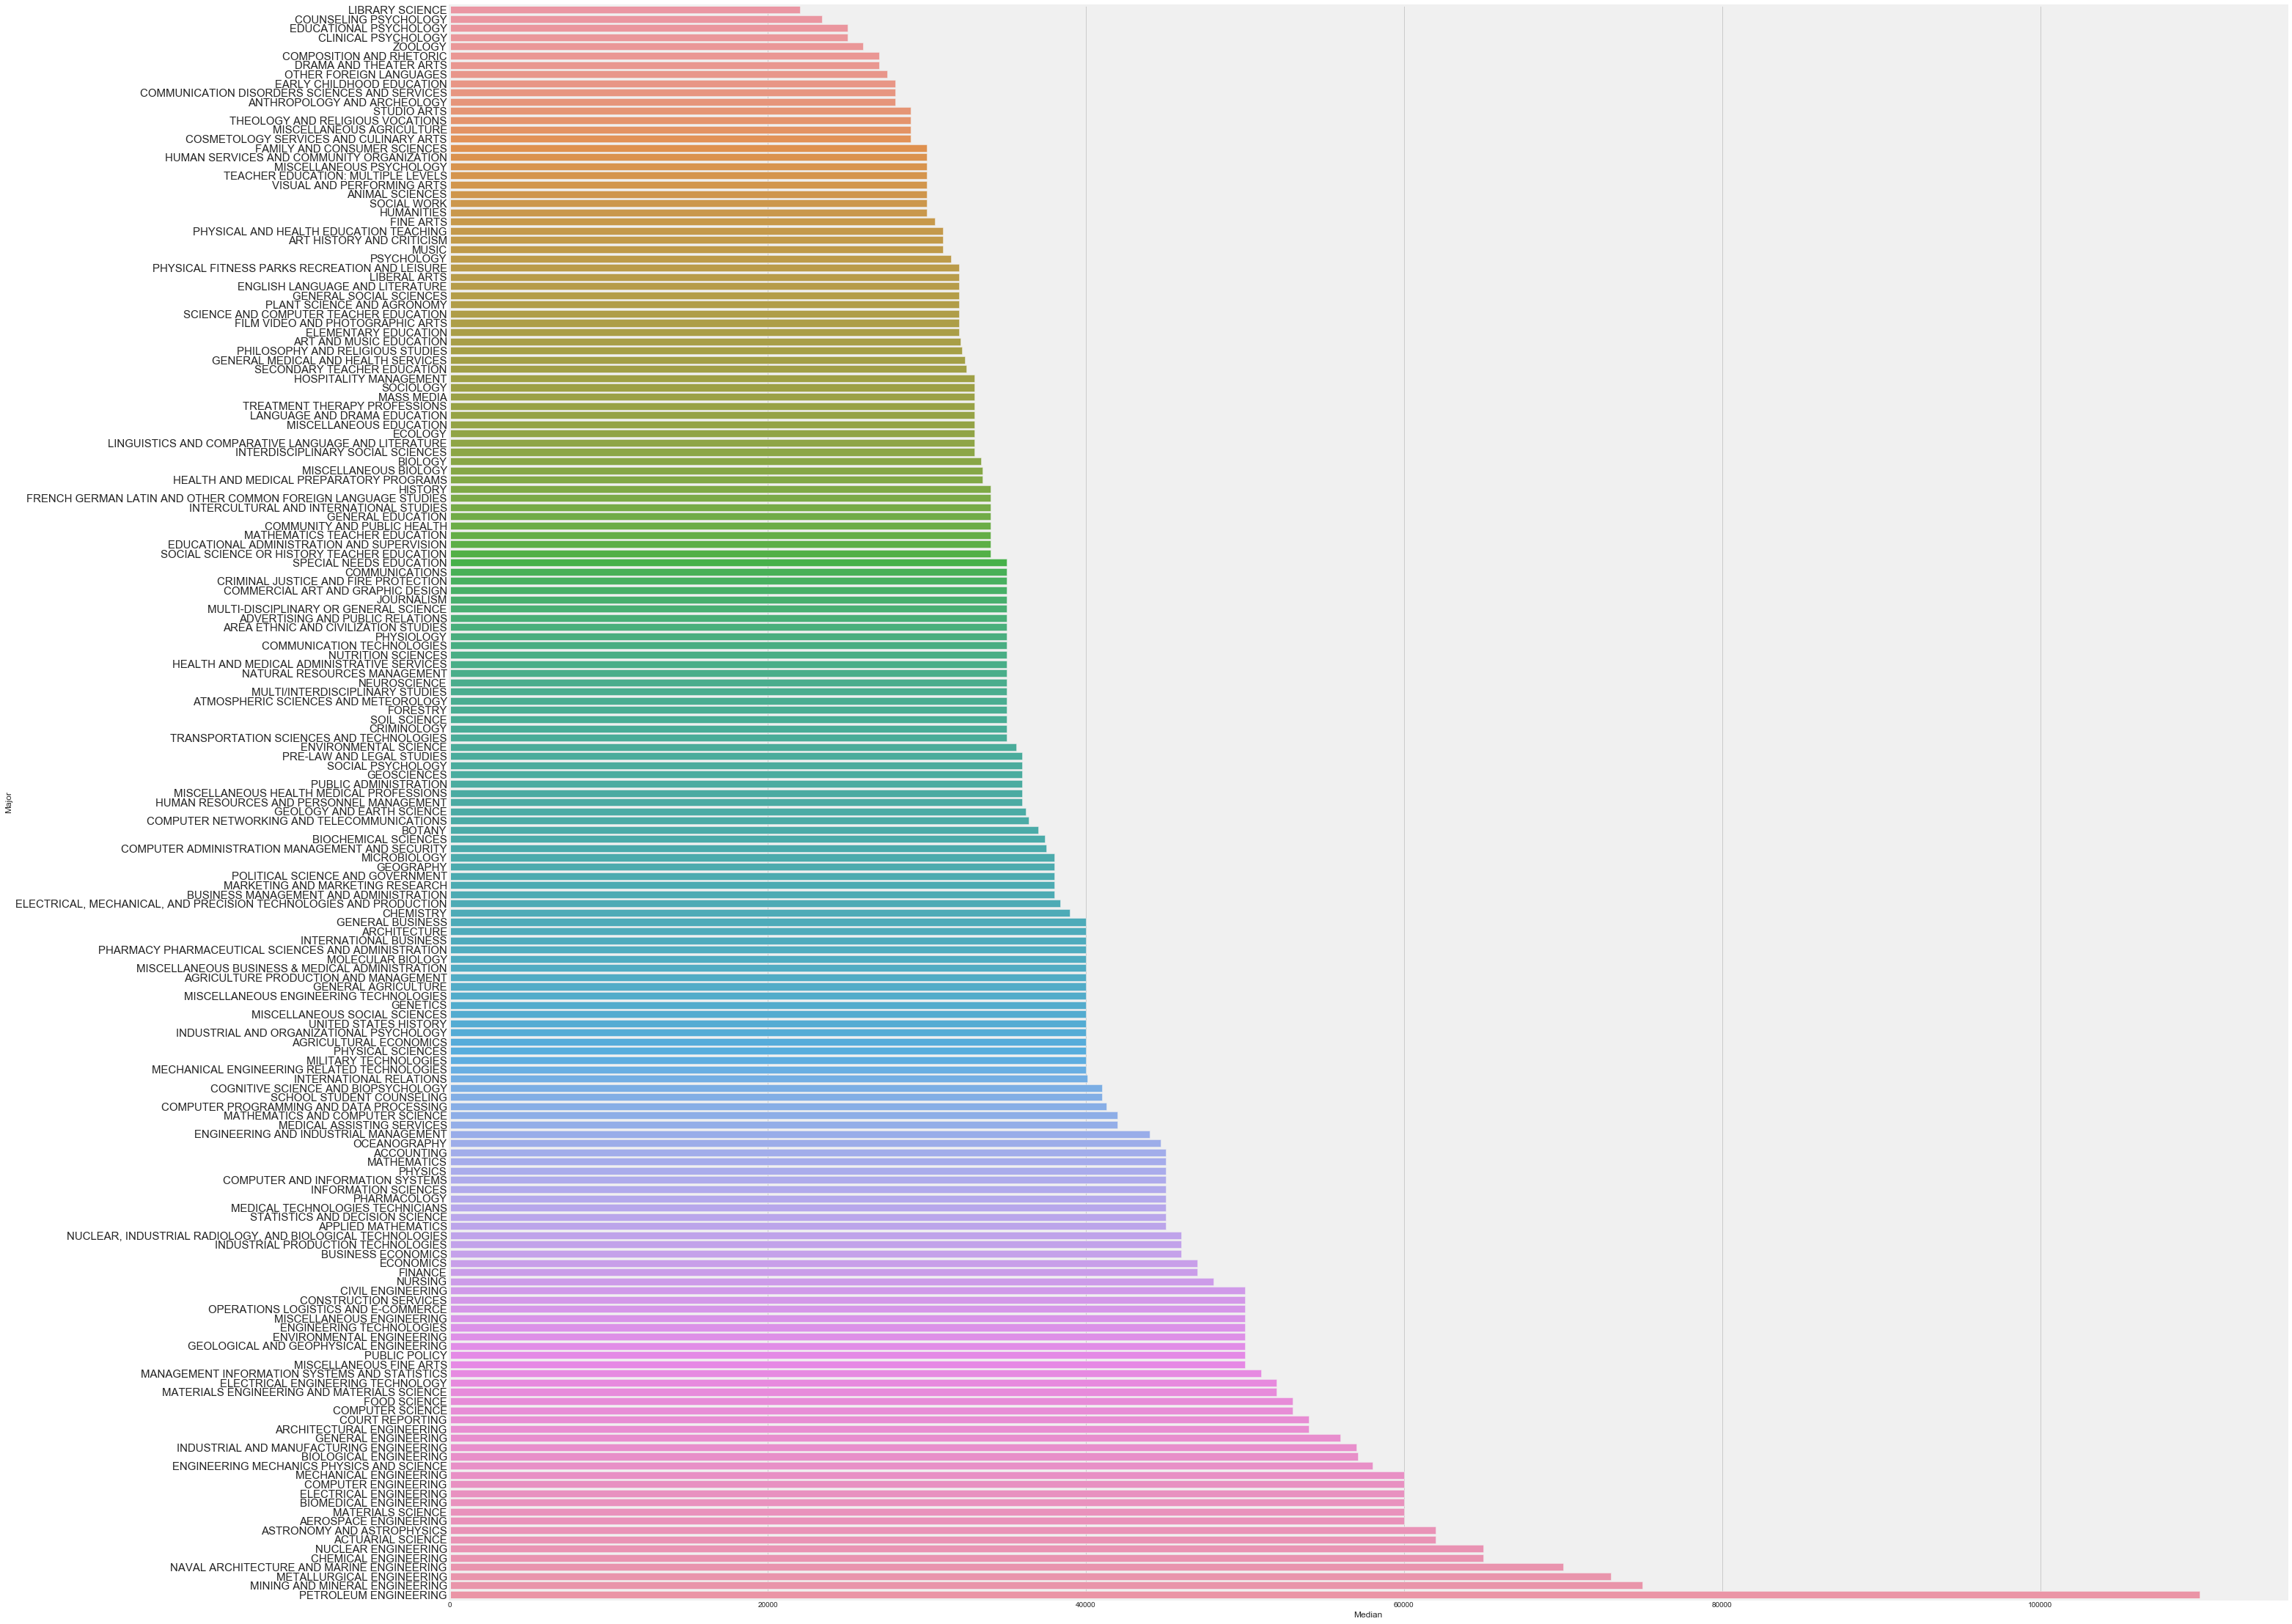

In [19]:
# Show the median salary of every major with ascending order
plt.figure(figsize = (40, 40))
plt.yticks( fontsize = 15)
sns.barplot(y = median.Major, x = median.Median)

### Observations:

### Highest- and Lowest-earning Majors:
 
   * Petroleum Engineering is by far the highestearning Bachelor’s degree major with median earnings of 110,000 and 75th percentile earnings of 125,000. This is followed by Mining and mineral engineering with median earnings of 75,000 and Metallurgical Engineering with median earnings of 73,000
   * Library science is the lowest-paying  major with a median of 22,000 and a 75th percentile peak of 22,000. This is followed by Counseling Psychology with median earnings of 23,400.
   * It doesn’t mean that popular major could earn more money in statistic, for example, although there are just 2339 graduate students in Petroleum Engineering, comparing with the large number of Business major, Petroleum Engineering is a major that earn the most income. 

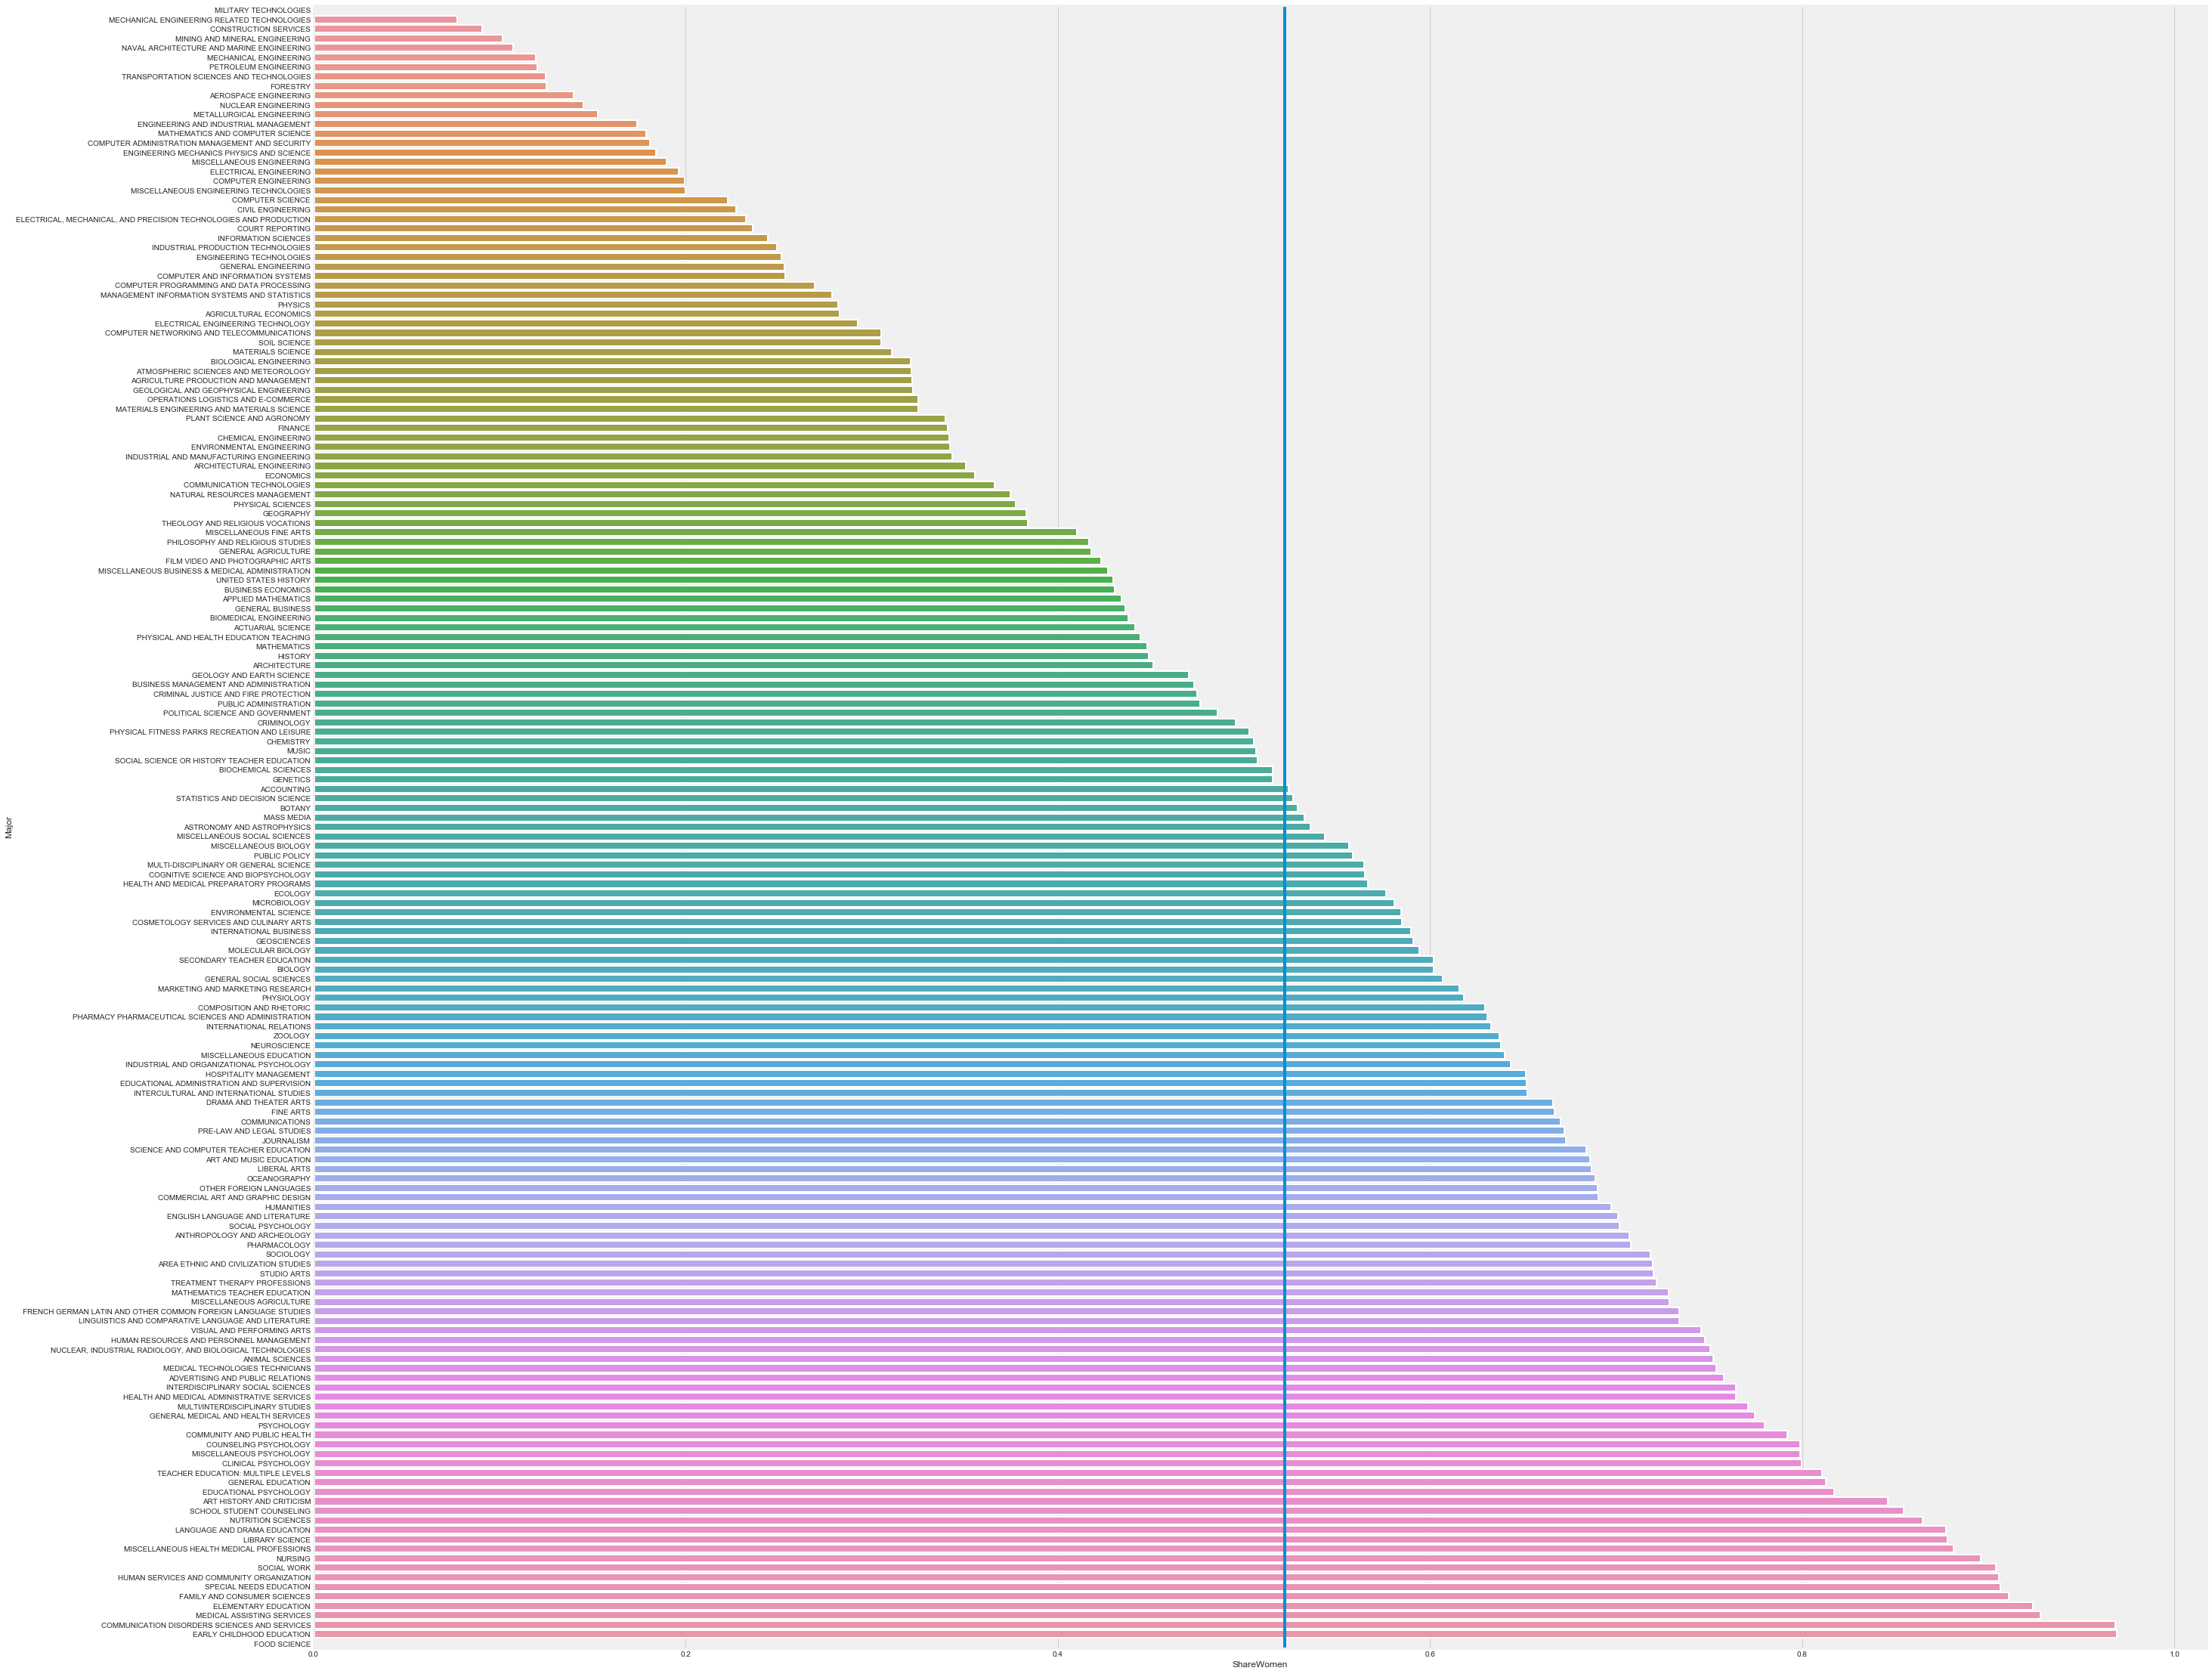

In [20]:
# Show the sharewomen of every major with ascending order
women = recent_grads.sort_values('ShareWomen')[['Major', 'ShareWomen']]
plt.figure(figsize = (40, 40))
sns.barplot(women['ShareWomen'], women['Major'], edgecolor = 'white', linewidth = 2)
plt.axvline(x = 0.522)

### Observations:
### Gender Concentrations by Major

* Early Childhood Education is the major with the highest proportion of women (97 percent). It is followed by Medical Assisting Services (96 percent), and Communication Disorders Sciences and Services (94 percent).

* The majors in which women are most heavily concentrated are almost exclusively in the Education and Health fields.

* The majors with the highest proportion of men are Military Technology and Mechanical Engineering and Related Technologies (94 percent).

* The top 10 majors with the highest proportion of men are in the Engineering and Industrial Arts and Consumer Services majors.


### 4.2  Draw Scatter Plots

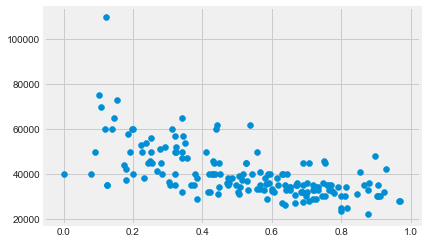

In [21]:
# Plot every Women as share of total with corresponding median incomes
plt.scatter(recent_grads['ShareWomen'], recent_grads['Median'], )

Text(0.5, 1.0, 'Total vs. Unemployment_rate')

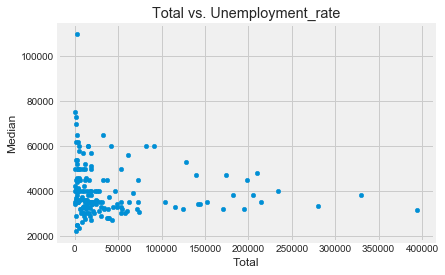

In [22]:
ax = recent_grads.plot(x='Total', y= 'Median', kind='scatter')
ax.set_title('Total vs. Unemployment_rate')

Text(0.5, 1.0, 'Total vs. Unemployment_rate')

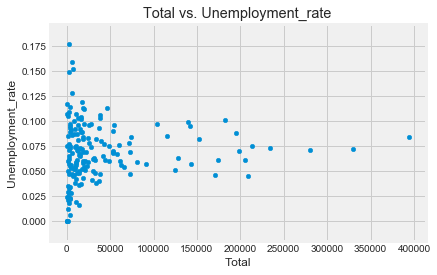

In [23]:
ax = recent_grads.plot(x='Total', y= 'Unemployment_rate', kind='scatter')
ax.set_title('Total vs. Unemployment_rate')

Text(0.5, 1.0, 'Full_time vs. Median')

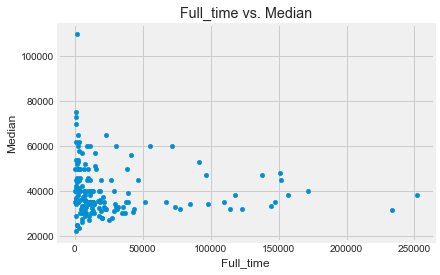

In [24]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

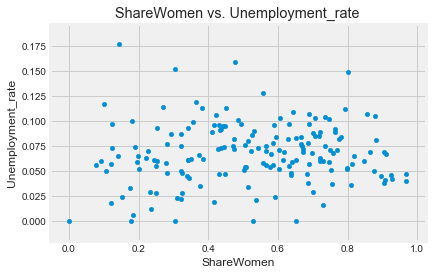

In [25]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

Text(0.5, 1.0, 'Men vs. Median')

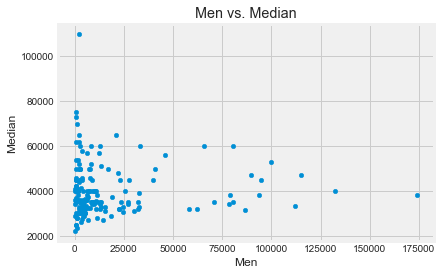

In [26]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

Text(0.5, 1.0, 'Women vs. Median')

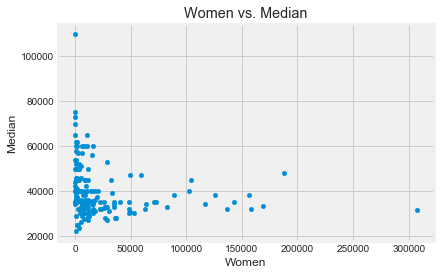

In [27]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

### Observations:

* The scatter plot shows a trend that the higher of women as share of total, the lower of their median earning of full-time. It shows that students that majored in subjects that were majority female do not make more money.
* Students in more popular majors do not make more money.
* More popular majors doesn't mean unemployment rate is lower.

### 4.3 Histograms

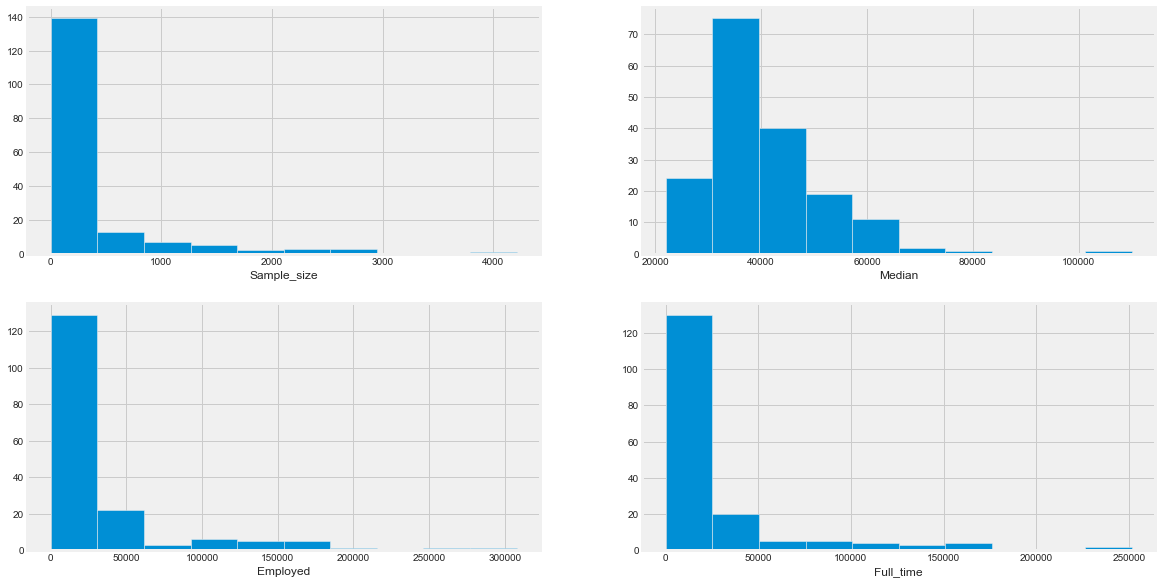

In [28]:
## Some histogram plots for various fields

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(0,4):
    ax = fig.add_subplot(2,2,r+1)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

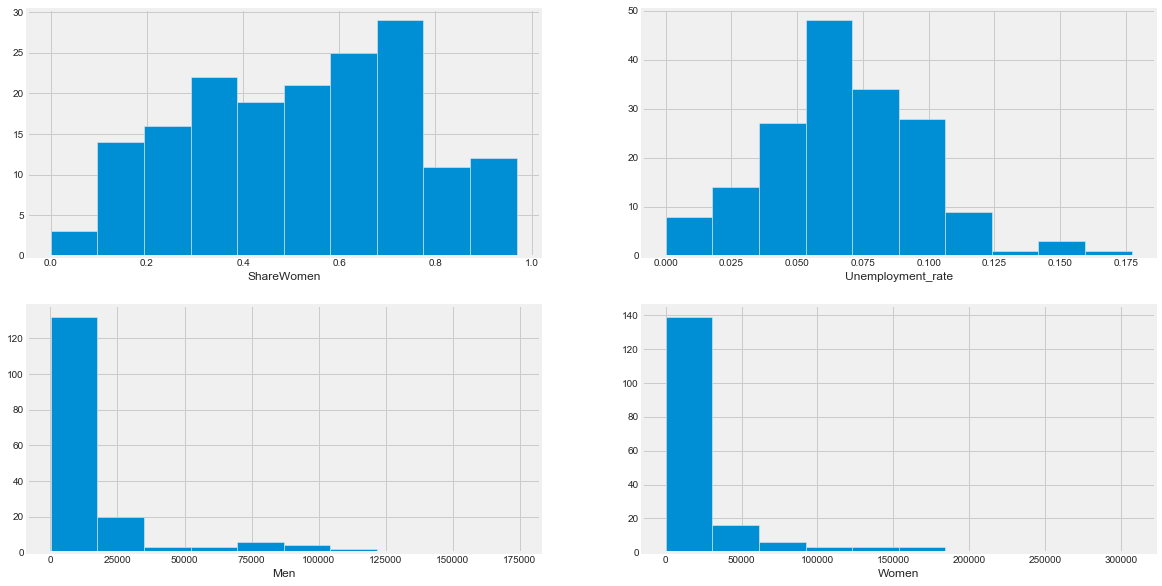

In [29]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(4,8):
    ax = fig.add_subplot(2,2,r-3)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

### Observations:
* Around 20 percent of majors are predominantly male.
* Around 20 percent of majors are predominantly female.
* The most commen median salary range is bettween 30000 to 40000.

### 4. 4 Bar Plots

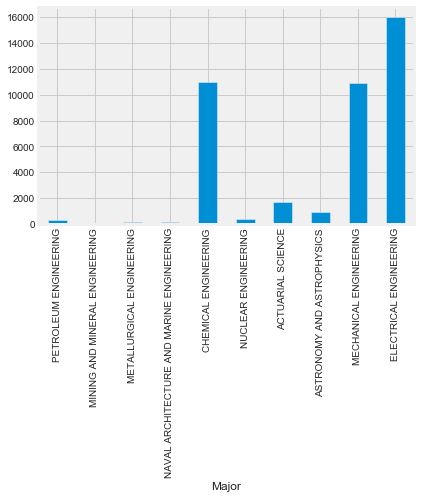

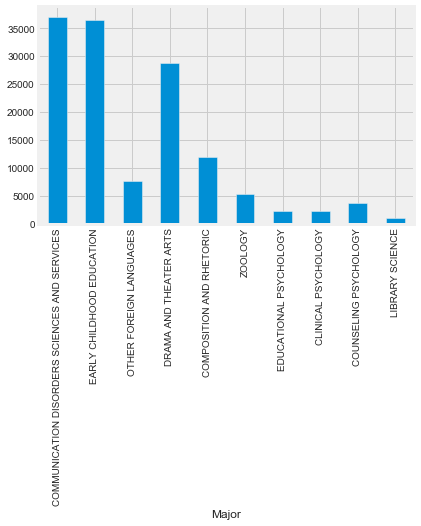

In [30]:
## Bar Plots in Pandas
## Comparison of percentages of women from 10 highest and lowest paying Majors

recent_grads[:10].plot.bar(x='Major', y='Women', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Women', legend=False)

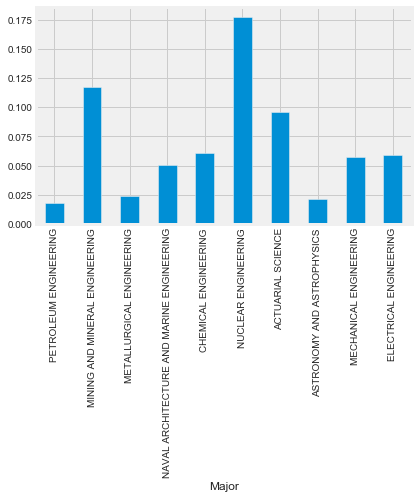

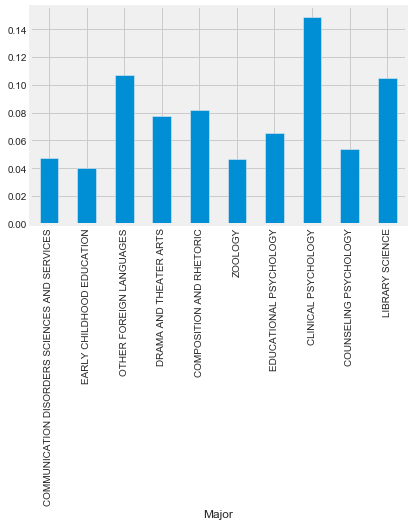

In [31]:
## Comparison of Unemployment Rate from 10 highest and lowest paying majors

recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

### Grouped bar plot to compare the number of men with the number of women in each category of majors

In [32]:
tm = recent_grads.pivot_table(index = 'Major_category', values = ['Men','Women'],aggfunc = np.sum)
tm

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


In [33]:
tm.index

Index(['Agriculture & Natural Resources', 'Arts', 'Biology & Life Science',
       'Business', 'Communications & Journalism', 'Computers & Mathematics',
       'Education', 'Engineering', 'Health', 'Humanities & Liberal Arts',
       'Industrial Arts & Consumer Services', 'Interdisciplinary',
       'Law & Public Policy', 'Physical Sciences', 'Psychology & Social Work',
       'Social Science'],
      dtype='object', name='Major_category')

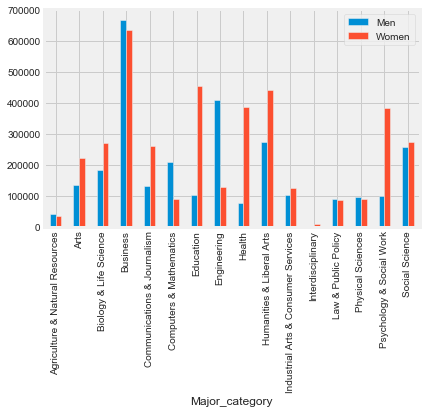

In [34]:
tm.plot.bar()

### 4.5 Box plot to explore the distributions of median salaries and unemployment rate.


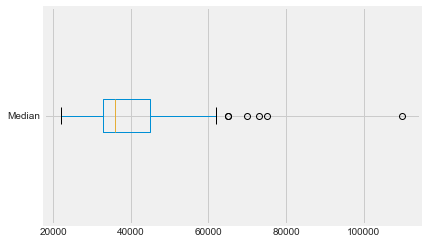

In [35]:
recent_grads['Median'].plot.box(vert=False)

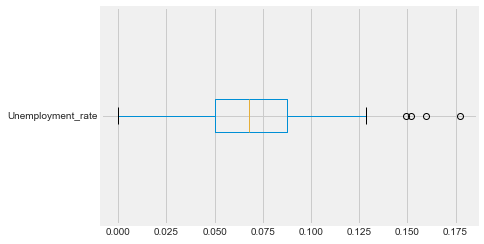

In [36]:
recent_grads['Unemployment_rate'].plot.box(vert=False)

## Observations:
* Majority of Recent Graduated Students are making around 35000 to 50000.
* The range of Umemployment rate for Recent Graduated Students is bettween 0 to 12 percent.
* The median Unemployment rate is 7 percent.
* The bottom 25 percent and top 25 percent are bettween 0 to 4 percent and 8 percent to 13 percent respectively.
* Majority of Unemployment are bettween 5 percent to 10 percent.

## 4.6 Hexagonal bin plot to visualize the columns that had dense scatter plots.

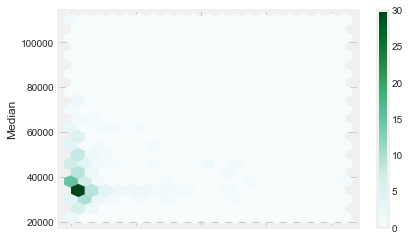

In [37]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=20)

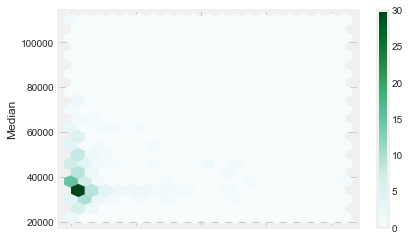

In [38]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=20)

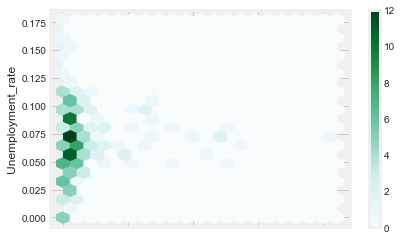

In [39]:
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=20)

## Observations:
* Again,Most recent graduated students are paying around 35000 a year.
* The Unemployment rates are around 5 percents to 10 percents

## 5.1 Explore grad_students

In [40]:
print('Rows:', grad_students.shape[0])
print('Columns:', grad_students.shape[1])
grad_students.head()

Rows: 173
Columns: 22


,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [41]:
grad_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
Major_code                      173 non-null int64
Major                           173 non-null object
Major_category                  173 non-null object
Grad_total                      173 non-null int64
Grad_sample_size                173 non-null int64
Grad_employed                   173 non-null int64
Grad_full_time_year_round       173 non-null int64
Grad_unemployed                 173 non-null int64
Grad_unemployment_rate          173 non-null float64
Grad_median                     173 non-null float64
Grad_P25                        173 non-null int64
Grad_P75                        173 non-null float64
Nongrad_total                   173 non-null int64
Nongrad_employed                173 non-null int64
Nongrad_full_time_year_round    173 non-null int64
Nongrad_unemployed              173 non-null int64
Nongrad_unemployment_rate       173 non-null float64
Nongrad_median    

### Observations:


  1. there is not a null values in grad_students, so we don't need to drop any columns.
  

Text(0.5, 1.0, 'Median salary Level of Graduate and nongraduate')

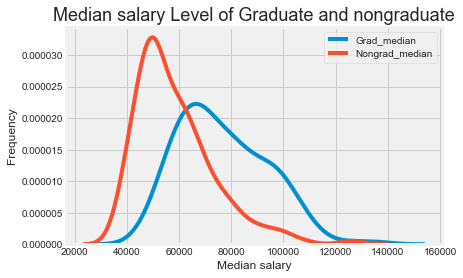

In [42]:
# Plot satisfation level of employees
ax=sbn.kdeplot(grad_students.Grad_median,label="Grad_median")
ax=sbn.kdeplot(grad_students.Nongrad_median,label="Nongrad_median")
ax.set(xlabel='Median salary',ylabel="Frequency")
plt.title("Median salary Level of Graduate and nongraduate",fontsize=18)

## Observations:
 1. As to the question of graduate degrees, the report reveals that obtaining a graduate level degree does lead to higher earnings, but how much in additional earnings is also driven by what you study.

## 6. Explore women_stem 


In [43]:
print('Rows:', women_stem.shape[0])
print('Columns:', women_stem.shape[1])
women_stem.head()

Rows: 76
Columns: 9


,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


### Additionally, women-stem.csv is a subset of recent-grads, we have already use those data for scatter plot in associated analysis on women in science/technology jobs before, which can be found in Chapter 4 Explore recent_grads.

## 7.Explore majors_list

In [44]:
print('Rows:', majors_list.shape[0])
print('Columns:', majors_list.shape[1])
majors_list.head()

Rows: 174
Columns: 3


,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [45]:
majors_list['Major_Category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_Category, dtype: int64

### The dataset majors_list has same information of dataset all_ages, we have explored and analysed Data before, the analysis is showed in Chapter 3. Explore all_ages dataset, so we don't need to have a further analyze.

## 8. Conclusion

 Those 5 datasets tell us what is the worth to choose a major through Economic factors. 
 
When we decide to choose a major,  we  need to consider  factors like salary potential or job opportunity, as they will affect your future, but weight them against your desire and commitment to pursue your passion. Choosing one of the top ten highest paying college majors may seem like a good idea, but it is not your only option for paying the bills. It is also possible to channel your passions into paths that might in the end be more successful.

Also, the importance of aligning a college major with your skillset. FFor example, If you’re no good at math, don’t go to school for actuarial science because you hear it has good pay and job security. In the long run,  it’s more important to choose a career that accentuates your strengths. Having polished and excellent skills at something makes you invaluable, it just may take a little longer to get the job that requires those skills.

It is important to figure out your major before you even start college. There are some tips might still help people in choosing the right educational path.

1. What Excites You?
The biggest thing to remember when choosing a major is to stick with a subject that interests you.

2. How Much Money Do You Want to Make?
It is undeniable that some careers just make more money than others, both as starting salaries and median salaries.

3. Is the Career Path Location-Specific?
Some careers are location-specific and you don't even know it. Students who want to become astronauts will often be located in Houston, where NASA is housed, or even in Fort Lauderdale. Students who want to become politicians often spend time in New York or the nation's capital.

4. What Schools are Best for Your Interests?
If you're one of those lucky students who knows what you'd like your major to be prior to applying for college, we suggest that you research your top choices first.

5. Don't Panic
It's normal to go to college not having a clear idea of what you'd like to do as a career; it's also normal to think you know what you want to do as a profession only to change your mind halfway through your time in college.
Universities are ready for this: Most schools won't expect you to declare a major until your sophomore or junior year, which leaves you room to finish the general requirements for your degree. You'll also have the chance to take electives, one of which may lead you to your new dream career path.